Links que usei para pesquisa de informação de modo a fazer este trabalho o melhor possível:

https://www.youtube.com/watch?v=ujId4ipkBio&t=831s

https://www.youtube.com/watch?v=ybzeyAfWh7U

https://towardsdatascience.com/simplify-your-dataset-cleaning-with-pandas-75951b23568e

https://medium.com/turing-talks/como-fazer-uma-limpeza-de-dados-completa-em-python-7abc9dfc19b8

https://pandas.pydata.org/docs/reference/api/pandas.read_json.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.add.html

https://towardsdatascience.com/from-dataframe-to-named-entities-4cfaa7251fc0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ethtweets.json to ethtweets.json


In [ ]:
import spacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
import json
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

file = pd.read_json("ethtweets.json")
df = pd.DataFrame(file)

#O Comando "del df", elimina algumas colunas que eu achei desnecessárias à tabela
del df["user_location"]
del df["user_description"]
del df["user_created"]
del df["user_friends"]
del df["user_favourites"]
del df["hashtags"]
del df["source"]
del df["is_retweet"]

df.head() #Imprime os 5 primeiros tweets da list, assim como os seus detalhes, username e etc...´


,user_name,user_followers,user_verified,date,text
0,#1 Crypto Currency TRADING,4,False,2021-11-15 07:26:39+00:00,Get upto 1000 that’s 10x with our premium spot...
1,Reyrey,343,False,2021-11-15 07:26:35+00:00,"Adopted a Hypocat #053, “Crazy Rich Cat” 🤑💵💵💵🤩..."
2,akter jahan,1,False,2021-11-15 07:26:32+00:00,Top 10 Coins by Social Engagement over the las...
3,riyan,11,False,2021-11-15 07:26:30+00:00,Requesting faucet funds into 0x5278942b39deD8c...
4,Michelle Eriksen,522,False,2021-11-15 07:26:30+00:00,New Listing BTS 0.008ETH !! \n#NFTs #nftcolle...


In [ ]:
#Limpar menções e mudanças de linha desnecessárias
mentions = ["@[A-Za-z0-9]", "\n", "#", "https", "t.co"]
for char in mentions:
    df['text'] = df['text'].str.replace(char, '')


<ipython-input-4-177f26352cc7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(char, '')


In [ ]:
df.shape #Diz-nos quantas linhas e quantas colunas tem o nosso dataset, respetivamente

(5000, 5)

In [ ]:
df.info() #Algumas infos uteis à cerca da nossa tabela, dados que vão ser úteis no futuro para criar métodos para limpar o texto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   user_name       5000 non-null   object             
 1   user_followers  5000 non-null   int64              
 2   user_verified   5000 non-null   object             
 3   date            5000 non-null   datetime64[ns, UTC]
 4   text            5000 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 195.4+ KB


In [ ]:
duplicados = df[df.duplicated(keep='first')] #Verifica se há dados repetidos
print(duplicados)

Empty DataFrame
Columns: [user_name, user_followers, user_verified, date, text]
Index: []


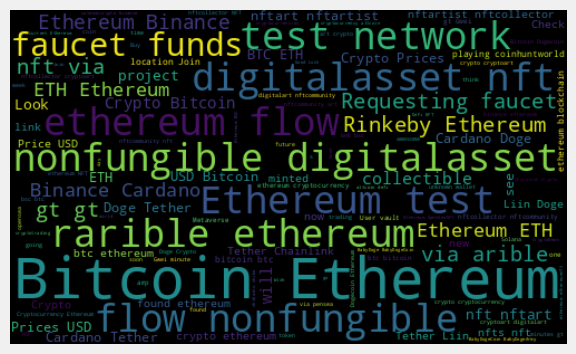

In [ ]:
#WordCloud
allWords = " ".join( [twts for twts in df['text']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 10, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
#10 entidades mais relevantes deste dataset
nlp.max_length = 1030000                       #mudei o máximo aceite pois o padrão "1000000" não chegava para o meu dataset inteiro
tokens = nlp(''.join(str(df.text.tolist())))
items = [x.text for x in tokens.ents]

print("="*80)
print("   IDENTIDADES MAIS USADAS NESTES TWEETS E Nº DE VEZES QUE É USADA")
print("="*80)
Counter(items).most_common(10)

   IDENTIDADES MAIS USADAS NESTES TWEETS E Nº DE VEZES QUE É USADA


[('Requesting', 516),
 ('Rinkeby Ethereum', 500),
 ('Ethereum', 426),
 ('NFT', 382),
 ('ETH', 308),
 ('USD/₿)Bitcoin', 207),
 ('NFTGiveaway', 142),
 ('💰', 139),
 ('10', 115),
 ('Tether', 101)]

In [ ]:
#Criar uma função que nos apresente a subjectividade
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Criar uma função que nos apresenta a polaridade
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Criar duas colunas na tabela, uma que corresponde aos valores da função "getSubjetivity" e outra que corresponda ao valor da função "getPolarity"
df["Subjectivity"] = df['text'].apply(getSubjectivity)
df["Polarity"] = df['text'].apply(getPolarity)

df

,user_name,user_followers,user_verified,date,text,Subjectivity,Polarity
0,#1 Crypto Currency TRADING,4,False,2021-11-15 07:26:39+00:00,Get upto 1000 that’s 10x with our premium spot...,0.379167,0.200000
1,Reyrey,343,False,2021-11-15 07:26:35+00:00,"Adopted a Hypocat 053, “Crazy Rich Cat” 🤑💵💵💵🤩 ...",0.825000,-0.065625
2,akter jahan,1,False,2021-11-15 07:26:32+00:00,Top 10 Coins by Social Engagement over the las...,0.211111,0.177778
3,riyan,11,False,2021-11-15 07:26:30+00:00,Requesting faucet funds into 0x5278942b39deD8c...,0.000000,0.000000
4,Michelle Eriksen,522,False,2021-11-15 07:26:30+00:00,New Listing BTS 0.008ETH !! NFTs nftcollector...,0.454545,0.213068
...,...,...,...,...,...,...,...
4995,AdityaPutraP,62,False,2021-11-14 21:04:34+00:00,Requesting faucet funds into 0x000000000000000...,0.000000,0.000000
4996,VoidXVision,101,False,2021-11-14 21:04:30+00:00,INGTokenHPB eirmaxsnkrs OWPayments_io $KING wi...,0.000000,0.000000
4997,Crypto News Daily,218,False,2021-11-14 21:04:30+00:00,"elon and timcook own Bitcoin and Ethereum , do...",1.000000,0.600000
4998,mamienova67400.eth,18,False,2021-11-14 21:04:22+00:00,oceilaChougar You may purchase my PILOT DREAM ...,0.000000,0.000000


In [ ]:
#Criar uma função que a partir do valores obtidosa anteriormente nos indique se o sentimento é Positivo, Neutro ou Negativo
def getAnalise(valor):
  if valor < 0:
    return "Negative"
  elif valor == 0.00:
    return "Neutral"
  else:
    return "Positive"

#Criar mais uma coluna na tabela, que nos indique o valor que a função "getAnalise" retorna
df["Analysis"] = df["Polarity"].apply(getAnalise)

df

,user_name,user_followers,user_verified,date,text,Subjectivity,Polarity,Analysis
0,#1 Crypto Currency TRADING,4,False,2021-11-15 07:26:39+00:00,Get upto 1000 that’s 10x with our premium spot...,0.379167,0.200000,Positive
1,Reyrey,343,False,2021-11-15 07:26:35+00:00,"Adopted a Hypocat 053, “Crazy Rich Cat” 🤑💵💵💵🤩 ...",0.825000,-0.065625,Negative
2,akter jahan,1,False,2021-11-15 07:26:32+00:00,Top 10 Coins by Social Engagement over the las...,0.211111,0.177778,Positive
3,riyan,11,False,2021-11-15 07:26:30+00:00,Requesting faucet funds into 0x5278942b39deD8c...,0.000000,0.000000,Neutral
4,Michelle Eriksen,522,False,2021-11-15 07:26:30+00:00,New Listing BTS 0.008ETH !! NFTs nftcollector...,0.454545,0.213068,Positive
...,...,...,...,...,...,...,...,...
4995,AdityaPutraP,62,False,2021-11-14 21:04:34+00:00,Requesting faucet funds into 0x000000000000000...,0.000000,0.000000,Neutral
4996,VoidXVision,101,False,2021-11-14 21:04:30+00:00,INGTokenHPB eirmaxsnkrs OWPayments_io $KING wi...,0.000000,0.000000,Neutral
4997,Crypto News Daily,218,False,2021-11-14 21:04:30+00:00,"elon and timcook own Bitcoin and Ethereum , do...",1.000000,0.600000,Positive
4998,mamienova67400.eth,18,False,2021-11-14 21:04:22+00:00,oceilaChougar You may purchase my PILOT DREAM ...,0.000000,0.000000,Neutral


In [ ]:
#Imprimir todos os tweets positivos PS: O número à esquerda não é o número do tweet no dataset, apenas uma contagem dos tweets imprimidos
print("="*80)
print("              TODOS OS TWEETS POSITIVOS")
print("="*80)

a=1
sortedDF = df.sort_values(by=["Polarity"])
for i in range (0, sortedDF.shape[0]):
  if(sortedDF["Analysis"][i] == "Positive"):
    print(str(a) + ") " + sortedDF['text'][i])
    a += 1

              TODOS OS TWEETS POSITIVOS
1) Get upto 1000 that’s 10x with our premium spot trading signals, accurate future signals....👇👇:///JH742TY9qn $BTC $ETH $BNB $SOL $ADA $KDA $VELAS $FLUX $LINA $LINK $XRP $COMP $AAVE $KCS $MIRcryptocurrency Bitcoin Ethereum :///7w49hFypB2
2) Top 10 Coins by Social Engagement over the last 24 hrs on LunarCrush!$btc bitcoin$doge dogecoin$eth ethereum$shib shibainu$cake pancakeswap$xtz tezos$ada cardano$sol solana$safemoon safemoonLunarShare
3) New Listing BTS 0.008ETH !! NFTs  nftcollector NFTCommunity art NFTdrop  OpenSeaNFT artwork NFTGiveaway NFTartist openseanfts nftart polygon NFTcollectibles Ethereum NFTdrop polygonNFT       :///nr2EtQCCDp via pensea
4) Top 10 Coins by Social Volume over the last 24 hrs on LunarCrush!$btc bitcoin$shib shibainu$eth ethereum$cake pancakeswap$doge dogecoin$sol solana$realm realm$nftbs nftbooks$safemoon safemoon LunarShare
5) This is my First art you can purchase my The cutest penguin NFT on Rarible now ฝากผลงานแ

In [ ]:
#Imprimir todos os tweets negativos PS: O número à esquerda não é o número do tweet no dataset, apenas uma contagem dos tweets imprimidos
print("="*80)
print("              TODOS OS TWEETS NEGATIVOS")
print("="*80)

a=1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range (0, sortedDF.shape[0]):
  if(sortedDF["Analysis"][i] == "Negative"):
    print(str(a) + ") " + sortedDF['text'][i])
    a += 1

              TODOS OS TWEETS NEGATIVOS


ValueError: ignored

In [ ]:
#Imprimir todos os tweets neutros PS: O número à esquerda não é o número do tweet no dataset, apenas uma contagem dos tweets imprimidos
print("="*80)
print("              TODOS OS TWEETS NEUTROS")
print("="*80)

a=1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range (0, sortedDF.shape[0]):
  if(sortedDF["Analysis"][i] == "Neutral"):
    print(str(a) + ") " + sortedDF['text'][i])
    a += 1

              TODOS OS TWEETS NEUTROS


ValueError: ignored

GRÁFICO DE ANÁLISE SENTIMENTAL TENDO COMO BASE A POLARIDADE E A SUBJECTIVIDADE


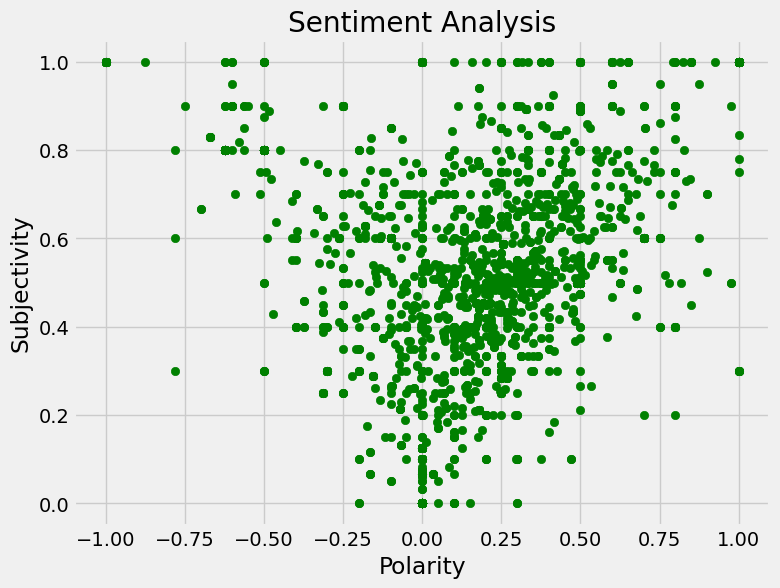

In [ ]:
#Criar um gráfico de análise sentimental com os valores obtidos anteriormente
print("="*80)
print("GRÁFICO DE ANÁLISE SENTIMENTAL TENDO COMO BASE A POLARIDADE E A SUBJECTIVIDADE")
print("="*80)

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color="Green")

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [ ]:
#Valor em percentagem de tweets positivos
ptweets = df[df.Analysis == "Positive"]
ptweets = ptweets['text']
print("% DE TWEETS POSITIVOS:")
round( (ptweets.shape[0] / df.shape[0]) *100, 1)

% DE TWEETS POSITIVOS:


36.5

In [ ]:
#Valor em percentagem de tweets negativos
ntweets = df[df.Analysis == "Negative"]
ntweets = ntweets['text']
print("% DE TWEETS NEGATIVOS:")
round( (ntweets.shape[0] / df.shape[0] *100), 1)

% DE TWEETS NEGATIVOS:


15.9

In [ ]:
#Valor em percentagem de tweets neutros
neutraltweets = df[df.Analysis == "Neutral"]
neutraltweets = neutraltweets['text']
print("% DE TWEETS NEUTROS:")
round( (neutraltweets.shape[0] / df.shape[0] *100), 1)

% DE TWEETS NEUTROS:


47.6

GRÁFICO DE BARRAS COM A ANÁLISE SENTIMENTAL CONCLUÍDA


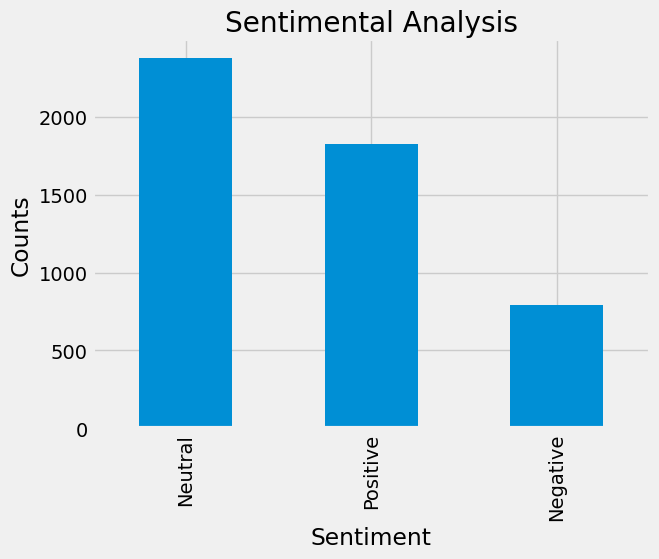

In [ ]:
#Gráfico de barras final com as conclusões retiradas a partir da análise sentimental feita
print("="*80)
print("GRÁFICO DE BARRAS COM A ANÁLISE SENTIMENTAL CONCLUÍDA")
print("="*80)

df["Analysis"].value_counts()

plt.title("Sentimental Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df["Analysis"].value_counts().plot(kind="bar")
plt.show()